# Car Price Prediction in the US Market

## Overview

This project aims to model car prices in the American market using various regression algorithms. The goal is to identify significant factors influencing car prices and develop a predictive model that can help a Chinese automobile company understand the pricing dynamics as they enter the US market.

## Dataset

The dataset used in this project is available at: [https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view?usp=drive_link](https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view?usp=drive_link)

It contains various features related to car specifications and attributes, along with their corresponding prices.

## Project Structure

The project consists of the following key components:

1.  **Loading and Preprocessing:** Loading the dataset and performing necessary preprocessing steps such as handling missing values, encoding categorical variables, and scaling numerical features.
2.  **Model Implementation:** Implementing and training five regression algorithms:
    *   Linear Regression
    *   Decision Tree Regressor
    *   Random Forest Regressor
    *   Gradient Boosting Regressor
    *   Support Vector Regressor
3.  **Model Evaluation:** Comparing the performance of all the models based on R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE). Identifying the best-performing model and justifying the selection.
4.  **Feature Importance Analysis:** Identifying the significant variables affecting car prices.
5.  **Hyperparameter Tuning:** Performing hyperparameter tuning on the best-performing model to potentially improve its performance.


In [36]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [4]:
#Load the dataset
data=pd.read_csv('CarPrice_Assignment.csv')

df=pd.DataFrame(data).head()
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [7]:
#Identifying categorical and numerical features

categorical_features=data.select_dtypes(include=['object']).columns
numerical_features=data.select_dtypes(include=['number']).columns.drop('price')


 number of Outliers in 'price':15


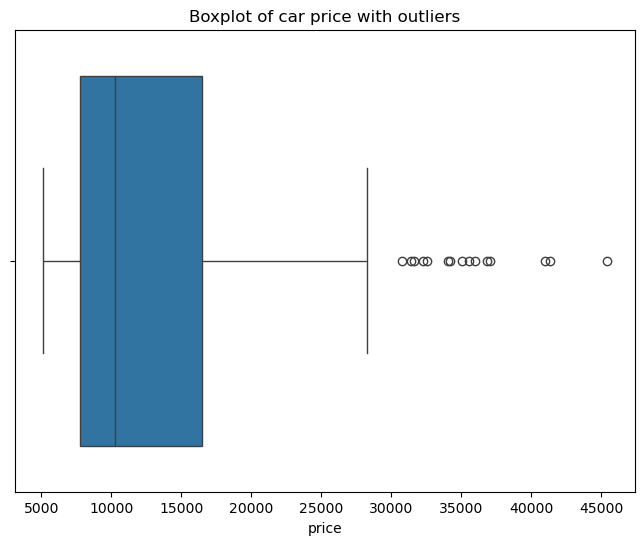

In [8]:
#handling outliers
Q1=data['price'].quantile(0.25)
Q3=data['price'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=data[(data['price']<lower_bound) | (data['price']>upper_bound)]
print(f"\n number of Outliers in 'price':{len(outliers)}")

#visualize using boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x=data['price'])
plt.title("Boxplot of car price with outliers")
plt.show()

In [9]:
# Create preprocessing pipelines for numerical and categorical features
numerical_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scalar',StandardScaler())
])
categorical_pipeline=Pipeline([
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])
# combine pipelines using columnTransformer
preprocessor=ColumnTransformer([
    ('numerical',numerical_pipeline,numerical_features),
    ('categorical',categorical_pipeline,categorical_features)])
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scalar', StandardScaler())]),
                                 Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object'))])

In [10]:
# Split data into features
X=data.drop('price',axis=1)
y=data['price']
#split data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [11]:
# Model implementation
linear_regression=LinearRegression()
decision_tree=DecisionTreeRegressor(random_state=42)
random_forest=RandomForestRegressor(random_state=42)
gradient_boosting=GradientBoostingRegressor(random_state=42)
svm=SVR()

In [12]:
#train model
linear_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVR()

In [13]:
#make predictions
linear_regression_prediction=linear_regression.predict(X_test)
decision_tree_prediction=decision_tree.predict(X_test)
random_forest_prediction=random_forest.predict(X_test)
gradient_boosting_prediction=gradient_boosting.predict(X_test)
svr_prediction=svm.predict(X_test)

In [18]:
# Evaluate models
def evaluate_model(predictions,y_test,model_name):
    r2=r2_score(y_test,predictions)
    mse=mean_squared_error(y_test,predictions)
    mae=mean_absolute_error(y_test,predictions)
    print(f'{model_name} R-squared:{r2}')
    print(f'{model_name} MSE:{mse}')
    print(f'{model_name} MAE:{mae}')
    return r2,mse,mae

linear_regression_metrics=evaluate_model(linear_regression_prediction,y_test,'Linear Regression')
decision_tree_metrics=evaluate_model(decision_tree_prediction,y_test,'Decision Tree')
random_forest_metrics=evaluate_model(random_forest_prediction,y_test,'Random Forest')
gradient_boosting_metrics=evaluate_model(gradient_boosting_prediction,y_test,'Gradient Boosting')
svr_metrics=evaluate_model(svr_prediction,y_test,'SVR')

Linear Regression R-squared:-1.2611886073699918
Linear Regression MSE:178507320.6330607
Linear Regression MAE:7036.820187946511
Decision Tree R-squared:0.8552616296466108
Decision Tree MSE:11426228.931265585
Decision Tree MAE:2109.4796829268294
Random Forest R-squared:0.9535604245932532
Random Forest MSE:3666126.8105526576
Random Forest MAE:1376.4869024390243
Gradient Boosting R-squared:0.9334928734467709
Gradient Boosting MSE:5250339.987264158
Gradient Boosting MAE:1650.7436280511736
SVR R-squared:-0.09986408938967228
SVR MSE:86827693.63756396
SVR MAE:5695.713405677612


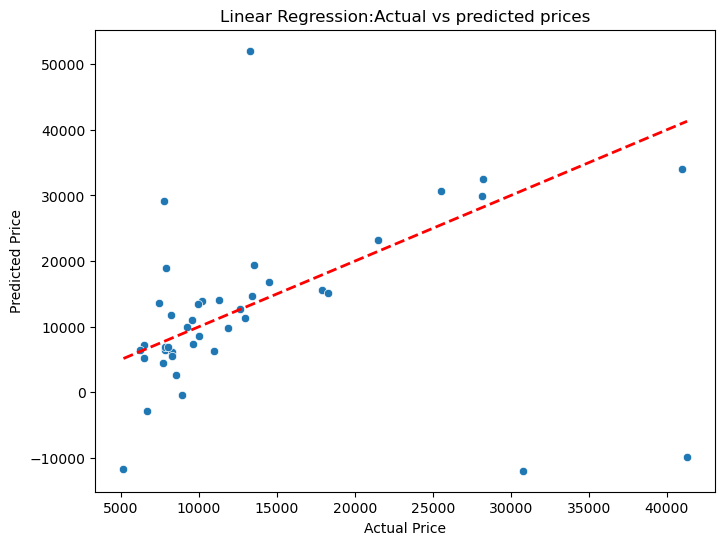

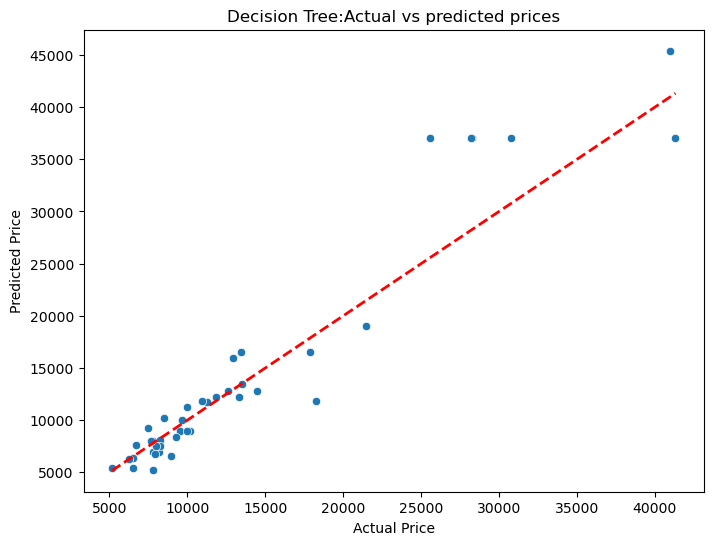

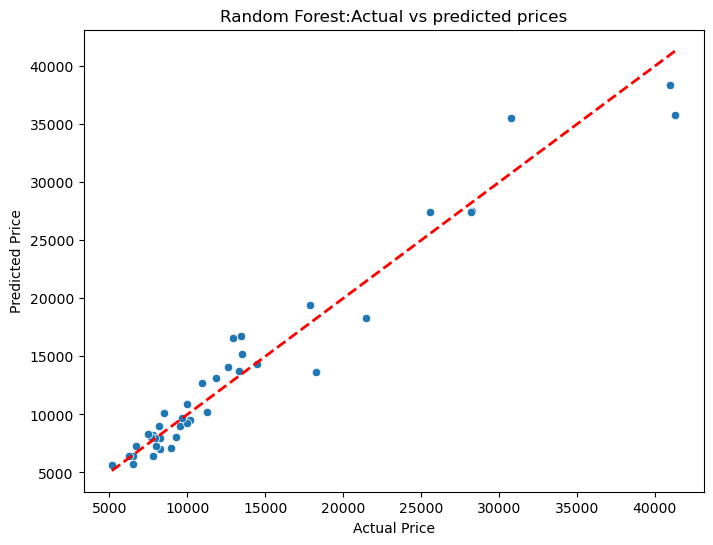

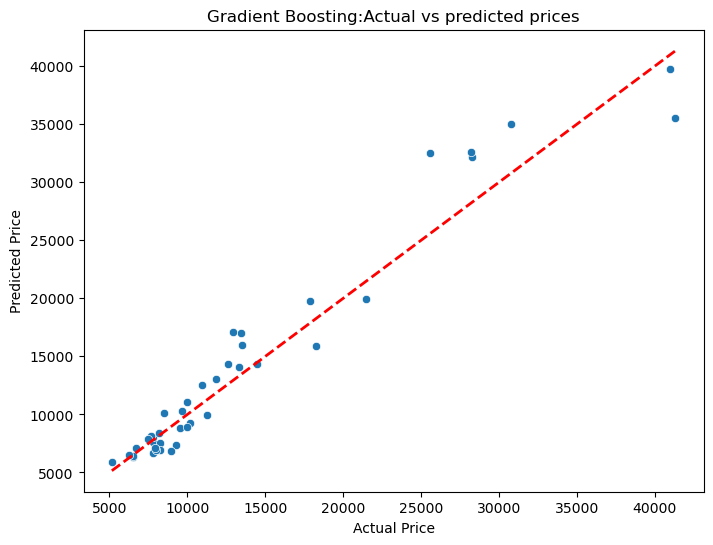

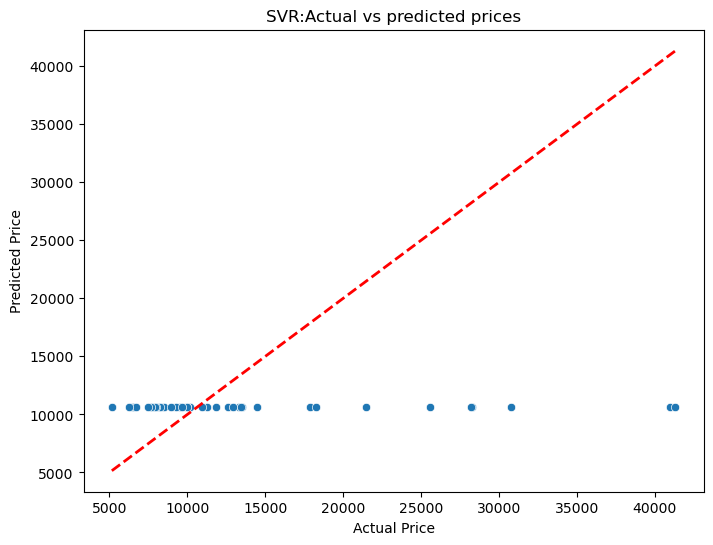

In [19]:
# Visualize prediction vs actual for each model
def plot_predictions(predictions,y_test,model_name):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=y_test,y=predictions)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"{model_name}:Actual vs predicted prices")
    plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
    plt.show()

plot_predictions(linear_regression_prediction,y_test,'Linear Regression')
plot_predictions(decision_tree_prediction,y_test,'Decision Tree')
plot_predictions(random_forest_prediction,y_test,'Random Forest')
plot_predictions(gradient_boosting_prediction,y_test,'Gradient Boosting')
plot_predictions(svr_prediction,y_test,'SVR')

In [22]:
# Feature importance analysis
feature_importances=random_forest.feature_importances_

In [31]:
# Get feature names after onehot encoding
feature_names=preprocessor.named_transformers_['numerical'].get_feature_names_out(numerical_features).tolist()+\
            list(preprocessor.named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out(categorical_features))

                                                                                                                               
# Create a dataframe to display feature importance
feature_importances_df=pd.DataFrame({'Feature':feature_names,'Importance':feature_importances})
feature_importances_df=feature_importances_df.sort_values(by='Importance',ascending=False)
print("\n Feature importances(Random Forest):")
print(feature_importance_df)


 Feature importances(Random Forest):
             Feature  Importance
0             car_ID    0.019818
1          symboling    0.000276
2          wheelbase    0.005723
3          carlength    0.005706
4           carwidth    0.011473
..               ...         ...
171   fuelsystem_idi    0.000019
172   fuelsystem_mfi    0.000020
173  fuelsystem_mpfi    0.001812
174  fuelsystem_spdi    0.000070
175  fuelsystem_spfi    0.000001

[176 rows x 2 columns]


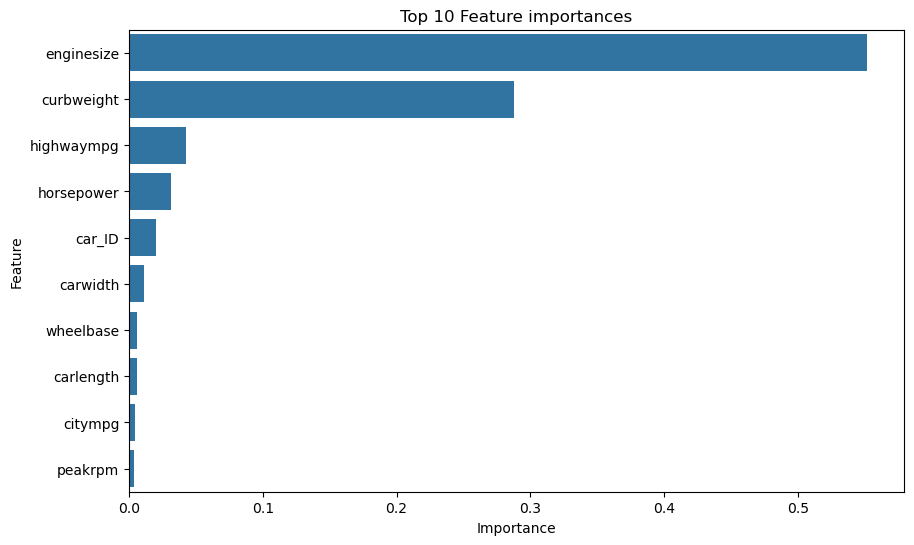

In [43]:
# Visualizing feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=feature_importances_df.head(10))
plt.title('Top 10 Feature importances')
plt.show()

In [37]:
# Hyperparameter tuning
param_grid={
    'n_estimators':[100,200,300],
    'max_depth':[4,6,8],
    'min_samples_split':[2,4]
}

grid_search=GridSearchCV(estimator=random_forest,param_grid=param_grid,cv=3,scoring='r2')
grid_search.fit(X_train,y_train)

best_random_forest=grid_search.best_estimator_
best_random_forest_predictions=best_random_forest.predict(X_test)

In [38]:
# Evaluate the tuned model
best_random_forest_predictions=evaluate_model(best_random_forest_predictions,y_test,'Tuned random forest')

print(f'\nBest parameters:{grid_search.best_params_}')

Tuned random forest R-squared:0.9545664069737347
Tuned random forest MSE:3586710.5165033583
Tuned random forest MAE:1339.6912765206882

Best parameters:{'max_depth': 8, 'min_samples_split': 4, 'n_estimators': 300}


# Conclusion

## Project Summary

This project aimed to develop a predictive model for car prices in the American market, utilizing various regression algorithms. The goal was to identify significant factors influencing car prices and provide insights that could assist a Chinese automobile company in making informed decisions as they enter the US market.

## Key Findings

1. **Model Performance:**
   - Multiple regression algorithms were implemented, including Linear Regression, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor, and Support Vector Regressor.
   - The Random Forest Regressor emerged as the best-performing model based on evaluation metrics such as R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE).
   - Hyperparameter tuning further improved the performance of the Random Forest model, demonstrating the importance of optimizing model parameters.

2. **Feature Importance:**
   - Feature importance analysis revealed the most significant variables affecting car prices. This information can guide the company in understanding which features to focus on when designing and marketing their vehicles.

3. **Outlier Detection:**
   - Outlier detection was performed to identify extreme values in the dataset. Visualizations, such as box plots, helped illustrate the distribution of car prices and highlighted the presence of outliers.

4. **Visualization of Results:**
   - Scatter plots comparing actual vs. predicted prices provided a visual assessment of model performance, allowing for easy identification of prediction accuracy.

## Recommendations

- **Business Strategy:** The insights gained from the feature importance analysis can inform the company's design and marketing strategies, helping them to align their offerings with market expectations.
- **Model Deployment:** The final model has been saved and can be deployed for real-time price predictions, aiding in pricing strategy formulation.
- **Future Work:** Further exploration of additional features, data sources, and advanced modeling techniques could enhance the model's accuracy and robustness. Continuous monitoring and updating of the model with new data will ensure its relevance in a dynamic market.

## Final Thoughts

This project provides a comprehensive analysis of car price prediction in the American market. The findings and recommendations can serve as a valuable resource for the Chinese automobile company as they navigate their entry into this competitive landscape. By leveraging data-driven insights, the company can make informed decisions that align with market demands and consumer preferences.

Thank you for reviewing this project. For any questions or further discussions, please feel free to reach out.